# Exemple simple de régression Linéaire

## Prédiction du prix des maisons à Boston avec Scikit-learn


Nous prendrons le jeu de données Housing qui contient des informations sur différentes maisons à Boston. Il y a 506 exemples et 13  caractéristiques dans cet ensemble de données. L objectif est de prédire les prix des maisons en utilisant les caractéristiques données.



In [1]:
#Chargez l'ensemble de données sur le logement de Boston à partir de sklearn.datasets
from sklearn.datasets import load_boston
boston_dataset = load_boston()

#imprimezla valeur du boston_dataset pour comprendre ce qu'il contient.
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

Note:

    data : contient les informations pour différentes maisons.
    
    cible : prix de la maison.
    
    feature_names : noms des caractéristiques
    
    DESCR : décrit le jeu de données.

In [2]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

## La description des Features : 

CRIM : taux de criminalité par habitant et par ville.

ZN : Proportion des terrains résidentiels zonés pour les terrains de plus de 25 000 pi2 (sq.ft)

INDUS : Proportion d'acres commerciaux non commerciaux par ville.

CHAS : variable fictive Charles River (= 1 si le secteur délimite la rivière ; 0 sinon).

NOX : Concentration d'oxyde nitrique (parties par 10 millions).

RM : Nombre moyen de pièces par logement.

AGE : Proportion de logements occupés par leur propriétaire construits avant 1940.

DIS : Distances pondérées par rapport à cinq centres d'emploi de Boston.

RAD : Indice d'accessibilité aux autoroutes radiales.

TAXE : Taux de la taxe foncière sur la valeur totale par tranche de 10 000 $.

PTRATIO : Ratio élèves-enseignant par commune.

B : 1000(Bk — 0,63)², où Bk est la proportion de [personnes d'ascendance afro-américaine] par ville.

LSTAT : Pourcentage de statut inférieur de la population.

MEDV : Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars

In [3]:
#Transformez le dataset en Dataframe
import pandas as pd

data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

data['MEDV'] = boston_dataset.target

print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Il est recommandé de voir s'il y a des valeurs manquantes dans les données. Nous comptons le nombre de valeurs manquantes pour chaque fonctionnalité en utilisant isnull()

In [4]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

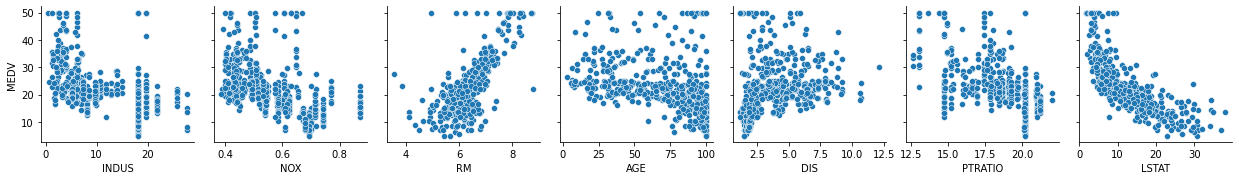

In [5]:
import seaborn as sns

# Permettre aux plots d'apparaître dans le notebook
%matplotlib inline

# Visualisez la relation entre les caractéristiques et la cible à l'aide de nuages de points(Scatter)
sns.pairplot(data, x_vars=['INDUS','NOX','RM','AGE','DIS','PTRATIO','LSTAT'], y_vars='MEDV')

In [6]:
# créez une liste Python de noms de fonctionnalités
feature = ['INDUS','NOX','RM','AGE','DIS','PTRATIO','LSTAT']

# utilisez la liste pour sélectionner un sous-ensemble du DataFrame d'origine
X = data[feature]

# Affichez les 5 premières lignes de X 
print(X.head())


   INDUS    NOX     RM   AGE     DIS  PTRATIO  LSTAT
0   2.31  0.538  6.575  65.2  4.0900     15.3   4.98
1   7.07  0.469  6.421  78.9  4.9671     17.8   9.14
2   7.07  0.469  7.185  61.1  4.9671     17.8   4.03
3   2.18  0.458  6.998  45.8  6.0622     18.7   2.94
4   2.18  0.458  7.147  54.2  6.0622     18.7   5.33


In [7]:
# Séléctionnez la colonne de la cible (y) 
y = data['MEDV']

#Affichez les 5 premières lignes de y
print(y.head())


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split
# dataset split : par défaut en 75% Train et 25% Test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
print(y_train.shape)


(379,)


In [9]:
# importez le modèle
from sklearn.linear_model import LinearRegression

# instantiation du modèle
model = LinearRegression()

# Entrainez le modèle sur l'ensemble d'entrainement 
model.fit(X_train, y_train)

LinearRegression()

In [10]:
print(model.intercept_)
print(model.coef_)
list(zip(feature, model.coef_))

42.45685498817033
[-1.24527583e-02 -1.78338930e+01  3.36266013e+00  5.61154805e-04
 -1.09897337e+00 -1.04705547e+00 -5.88673363e-01]


[('INDUS', -0.012452758288057086),
 ('NOX', -17.83389304327458),
 ('RM', 3.3626601250485275),
 ('AGE', 0.0005611548051801154),
 ('DIS', -1.0989733650930371),
 ('PTRATIO', -1.0470554714986062),
 ('LSTAT', -0.5886733627335711)]

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE=",mean_absolute_error(y_test,y_pred))
print("MSE=",mean_squared_error(y_test,y_pred))
print("RMSE=",mean_squared_error(y_test,y_pred,squared=False))
print("R-squared=",r2_score(y_test,y_pred))


MAE= 3.8474681338634715
MSE= 24.527503930773417
RMSE= 4.952525005567707
R-squared= 0.7523936817310943


In [13]:
# créer une liste Python de noms de fonctionnalités
feature = ['CRIM','INDUS','NOX','RM','AGE','DIS','PTRATIO','LSTAT']

# utiliser la liste pour sélectionner un sous-ensemble du DataFrame d'origine
X = data[feature]

# Séléctionner la colonne de la cible (y) 
y = data['MEDV']

# Diviser le dataset en 80% Train et 20% Test  et interdire le mélange
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1,shuffle=False)

# instantiation du modèle
model = LinearRegression()

# Entrainer le modèle sur l'ensemble d'entrainement 
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)


# Calculer le RMSE du prédiction
print("RMSE=",mean_squared_error(y_test,y_pred,squared=False))

RMSE= 4.856507146776215


In [14]:
# créer une liste Python de noms de fonctionnalités
feature = ['CRIM','INDUS','NOX','DIS','PTRATIO','LSTAT']

# utiliser la liste pour sélectionner un sous-ensemble du DataFrame d'origine
X = data[feature]

# Séléctionner la colonne de la cible (y) 
y = data['MEDV']

# Diviser le dataset en 80% Train et 20% Test  et interdire le mélange
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=1,shuffle=False)

# instantiation du modèle
model = LinearRegression()

# Entrainer le modèle sur l'ensemble d'entrainement 
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)


# Calculer le RMSE du prédiction
print("MAE=",mean_absolute_error(y_test,y_pred))
print("MSE=",mean_squared_error(y_test,y_pred))
print("RMSE=",mean_squared_error(y_test,y_pred,squared=False))
print("R-squared=",r2_score(y_test,y_pred))

MAE= 2.3798236075965193
MSE= 10.373418667139335
RMSE= 3.2207792018608377
R-squared= 0.5000306554196875


In [15]:
# créer une liste Python de noms de fonctionnalités
feature = ['CRIM','INDUS','NOX','DIS','PTRATIO','LSTAT','RM']

# utiliser la liste pour sélectionner un sous-ensemble du DataFrame d'origine
X = data[feature]

# Séléctionner la colonne de la cible (y) 
y = data['MEDV']

# Diviser le dataset en 80% Train et 20% Test  et interdire le mélange
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1,shuffle=False)

# instantiation du modèle
model = LinearRegression()

# Entrainer le modèle sur l'ensemble d'entrainement 
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)


# Calculer le RMSE du prédiction
print("MAE=",mean_absolute_error(y_test,y_pred))
print("MSE=",mean_squared_error(y_test,y_pred))
print("RMSE=",mean_squared_error(y_test,y_pred,squared=False))
print("R-squared=",r2_score(y_test,y_pred))

MAE= 3.925792904328931
MSE= 23.501226696914575
RMSE= 4.847806379891278
R-squared= 0.12597056566657394
